<a href="https://colab.research.google.com/github/KabichNeu/StockMarketPrediction/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#newdata after mining
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (5).csv


In [ ]:
import io
import pandas as pd
stockdata = pd.read_csv(io.BytesIO(uploaded['data.csv']), index_col = 0)

In [ ]:
stockdata

,Date,open,high,low,close,vol,RSI,MACD,CCI,ADX
0,2012-01-01,873.0,879.0,851.0,879.0,799,NaN,0.000000,NaN,NaN
1,2012-01-02,879.0,913.0,882.0,900.0,1002,100.000000,0.471154,66.666667,100.000000
2,2012-01-03,900.0,916.0,892.0,892.0,2653,70.909091,0.352264,54.237288,100.000000
3,2012-01-04,892.0,875.0,842.0,865.0,490,34.466349,-0.685267,-84.313725,67.623618
4,2012-01-05,865.0,875.0,858.0,858.0,121,30.141309,-1.513166,-59.581320,52.310464
...,...,...,...,...,...,...,...,...,...,...
1905,2020-03-16,741.0,764.0,723.0,750.0,55501,43.675570,7.924927,-124.141364,26.345841
1906,2020-03-17,765.0,765.0,721.0,731.0,46620,41.364612,1.680259,-115.728978,29.561957
1907,2020-03-18,731.0,739.0,700.0,715.0,43913,39.470618,-4.507789,-120.879121,33.988905
1908,2020-03-19,701.0,740.0,690.0,730.0,55806,42.145136,-8.108023,-101.120479,38.117933


In [ ]:
import numpy as np
stockdata['CL-OP'] = stockdata['close'] - stockdata['open']
stockdata['Class'] = np.where(stockdata['CL-OP'] > 0, 1, 0)

In [ ]:
stockdata['Date'] = pd.to_datetime(stockdata['Date'],format = '%Y/%m/%d')

In [ ]:
stockdata = stockdata.drop(0)

In [ ]:
stockdata

,Date,open,high,low,close,vol,RSI,MACD,CCI,ADX,CL-OP,Class
1,2012-01-02,879.0,913.0,882.0,900.0,1002,100.000000,0.471154,66.666667,100.000000,21.0,1
2,2012-01-03,900.0,916.0,892.0,892.0,2653,70.909091,0.352264,54.237288,100.000000,-8.0,0
3,2012-01-04,892.0,875.0,842.0,865.0,490,34.466349,-0.685267,-84.313725,67.623618,-27.0,0
4,2012-01-05,865.0,875.0,858.0,858.0,121,30.141309,-1.513166,-59.581320,52.310464,-7.0,0
5,2012-01-08,858.0,845.0,814.0,830.0,4835,19.565232,-3.179699,-141.040462,54.601490,-28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1905,2020-03-16,741.0,764.0,723.0,750.0,55501,43.675570,7.924927,-124.141364,26.345841,9.0,1
1906,2020-03-17,765.0,765.0,721.0,731.0,46620,41.364612,1.680259,-115.728978,29.561957,-34.0,0
1907,2020-03-18,731.0,739.0,700.0,715.0,43913,39.470618,-4.507789,-120.879121,33.988905,-16.0,0
1908,2020-03-19,701.0,740.0,690.0,730.0,55806,42.145136,-8.108023,-101.120479,38.117933,29.0,1


In [ ]:
stockdata.reset_index(drop = True)

,Date,open,high,low,close,vol,RSI,MACD,CCI,ADX,CL-OP,Class
0,2012-01-02,879.0,913.0,882.0,900.0,1002,100.000000,0.471154,66.666667,100.000000,21.0,1
1,2012-01-03,900.0,916.0,892.0,892.0,2653,70.909091,0.352264,54.237288,100.000000,-8.0,0
2,2012-01-04,892.0,875.0,842.0,865.0,490,34.466349,-0.685267,-84.313725,67.623618,-27.0,0
3,2012-01-05,865.0,875.0,858.0,858.0,121,30.141309,-1.513166,-59.581320,52.310464,-7.0,0
4,2012-01-08,858.0,845.0,814.0,830.0,4835,19.565232,-3.179699,-141.040462,54.601490,-28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1904,2020-03-16,741.0,764.0,723.0,750.0,55501,43.675570,7.924927,-124.141364,26.345841,9.0,1
1905,2020-03-17,765.0,765.0,721.0,731.0,46620,41.364612,1.680259,-115.728978,29.561957,-34.0,0
1906,2020-03-18,731.0,739.0,700.0,715.0,43913,39.470618,-4.507789,-120.879121,33.988905,-16.0,0
1907,2020-03-19,701.0,740.0,690.0,730.0,55806,42.145136,-8.108023,-101.120479,38.117933,29.0,1


In [ ]:
stockdata = stockdata.set_index('Date')


In [ ]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1909 entries, 2012-01-02 to 2020-03-22
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1909 non-null   float64
 1   high    1909 non-null   float64
 2   low     1909 non-null   float64
 3   close   1909 non-null   float64
 4   vol     1909 non-null   int64  
 5   RSI     1909 non-null   float64
 6   MACD    1909 non-null   float64
 7   CCI     1909 non-null   float64
 8   ADX     1909 non-null   float64
 9   CL-OP   1909 non-null   float64
 10  Class   1909 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 179.0 KB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

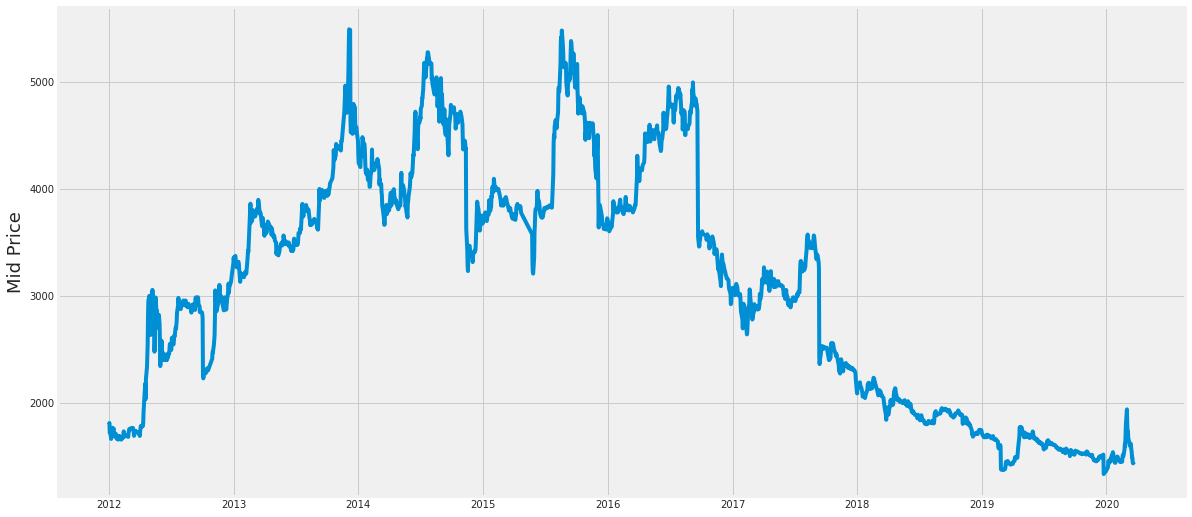

In [ ]:
#mid-price of the stuck eachday
stockdata['MID-STOCKPRICE'] = stockdata['low']+stockdata['high']
def plot_midstockprice():
  plt.figure(figsize = (18,9))
  plt.plot(stockdata['MID-STOCKPRICE'])
  plt.xlabel(None)
  plt.ylabel('Mid Price',fontsize=18)
  plt.show()

plot_midstockprice()


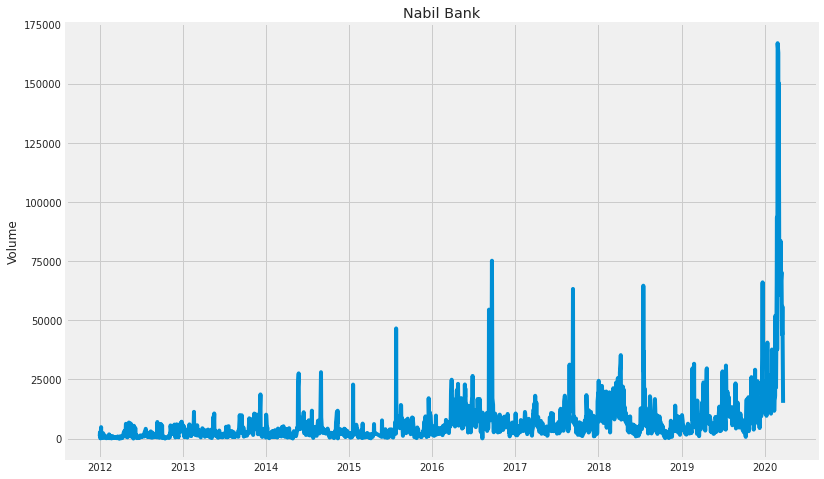

In [ ]:
# the total volume of stock being traded each day
def plot_totalVolume():
  plt.figure(figsize = (12,8))
  plt.plot(stockdata['vol'])
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title('Nabil Bank')

plot_totalVolume()

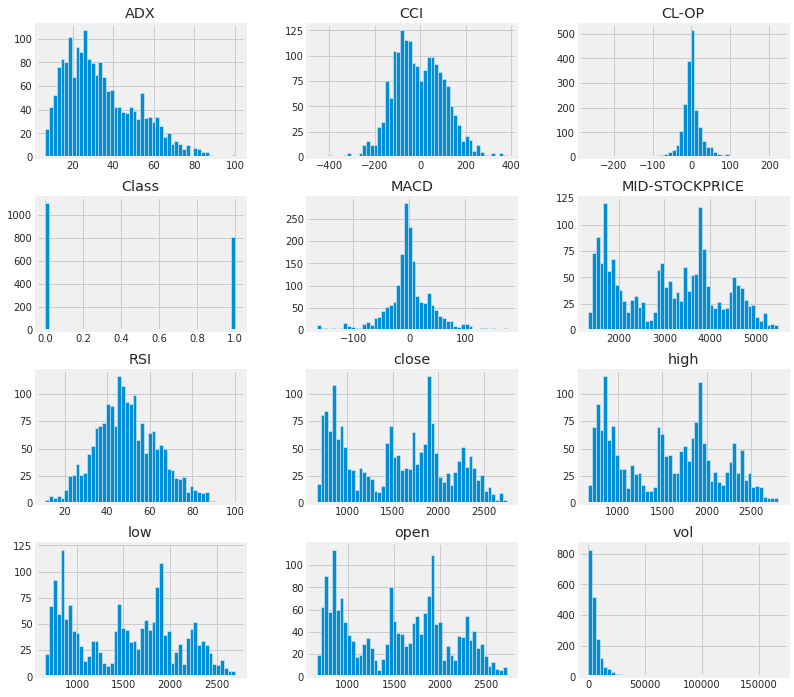

In [ ]:
def describe_visualize():
  stockdata.hist(bins = 50 , figsize = (12,12) )
  plt.show()

describe_visualize()

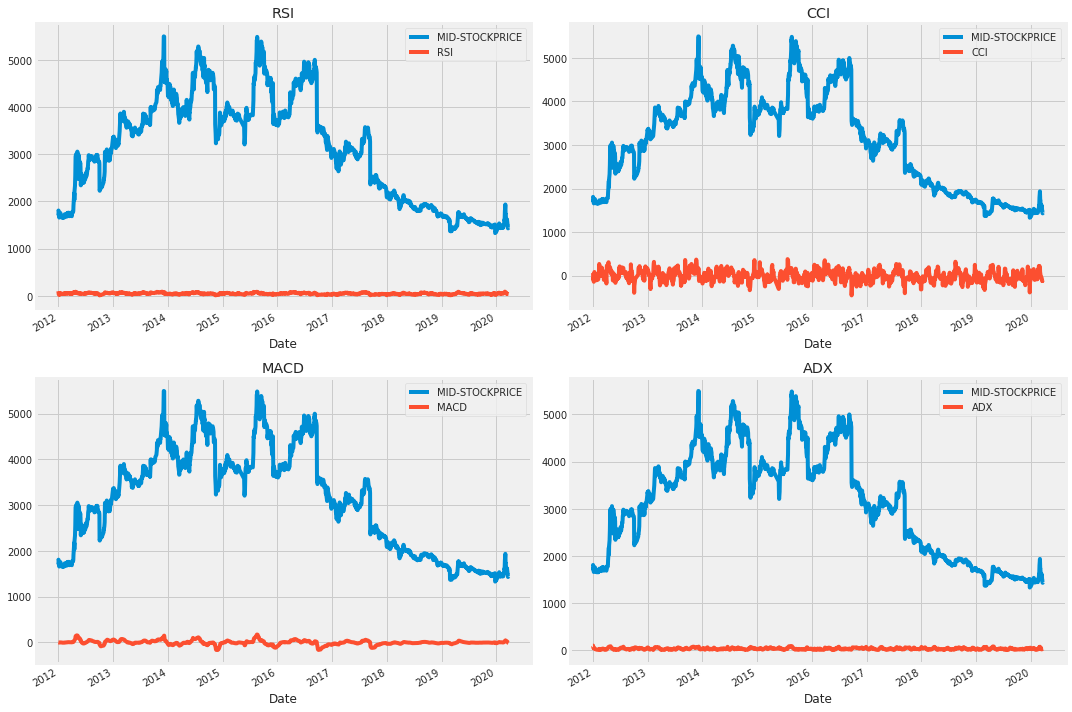

In [ ]:
def plot_indicators():
  fig,axes = plt.subplots(nrows = 2, ncols = 2)
  fig.set_figheight(10)
  fig.set_figwidth(15)

  stockdata[['MID-STOCKPRICE','RSI']].plot(ax = axes[0,0])
  axes[0,0].set_title('RSI')

  stockdata[['MID-STOCKPRICE','CCI']].plot(ax = axes[0,1])
  axes[0,1].set_title('CCI')

  stockdata[['MID-STOCKPRICE','MACD']].plot(ax = axes[1,0])
  axes[1,0].set_title('MACD')

  stockdata[['MID-STOCKPRICE','ADX']].plot(ax = axes[1,1])
  axes[1,1].set_title('ADX')

  fig.tight_layout()

plot_indicators()


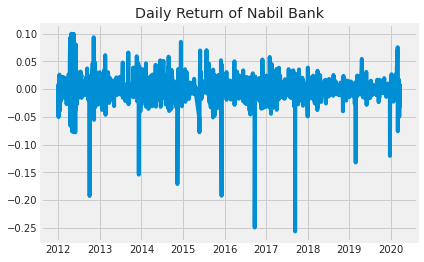

In [ ]:
def percent_change():
  stockdata['Daily Return'] = stockdata['MID-STOCKPRICE'].pct_change()
  # Then we'll plot the daily return percentage
  
  plt.plot(stockdata['Daily Return'])
  plt.title('Daily Return of Nabil Bank')

percent_change()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f729c2dee48>,
      dtype=object)

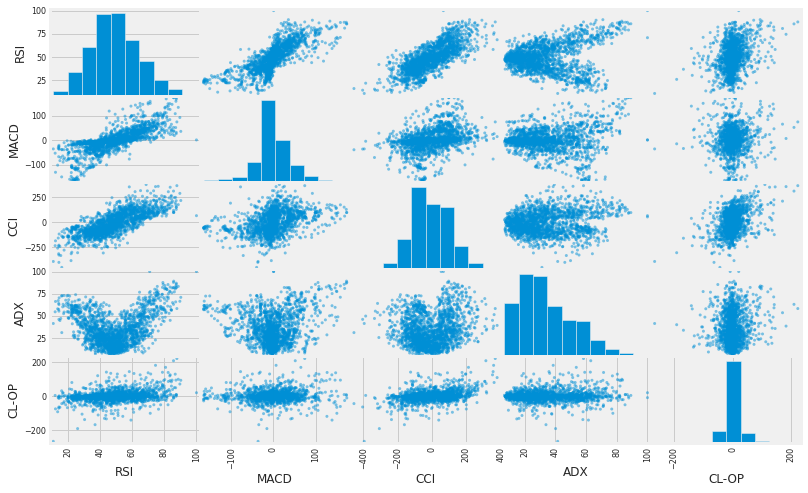

In [ ]:
attributes = ["RSI","MACD","CCI","ADX","CL-OP"]
from matplotlib import cm
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(stockdata[attributes], figsize=(12, 8))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(stockdata[['RSI','MACD','CCI','ADX']],stockdata['Class'], test_size = 0.30, shuffle = False)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_train_scaled

array([[1.        , 0.48893045, 0.62458385, 1.        ],
       [0.67323259, 0.48857938, 0.60967092, 1.        ],
       [0.26388477, 0.48551569, 0.44343561, 0.65052655],
       ...,
       [0.15253561, 0.34669079, 0.37335055, 0.42070717],
       [0.10952566, 0.33831739, 0.3350368 , 0.49946056],
       [0.18749921, 0.3381687 , 0.37390284, 0.56320418]])

In [ ]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train_scaled, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
X_test_scaled = scaler.transform(X_test)
accuracy = clf.score(X_test_scaled, y_test) #test Accuracy squared error for linreg
print(accuracy)

0.6509598603839442


In [ ]:
for this_gamma in [0.01, 1.0, 10.0]:
    clf = svm.SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train_scaled, y_train)
    accuracy = clf.score(X_test_scaled, y_test) #test Accuracy squared error for linreg
    print(accuracy)

0.6701570680628273
0.6509598603839442
0.6788830715532286


In [ ]:
for kernel_arg in ['rbf','poly','linear']:
        clf = svm.SVC(kernel=kernel_arg,max_iter=5000)
        clf.fit(X_train_scaled,y_train)
        accuracy = clf.score(X_test_scaled,y_test)
        print('The Accurary of %s : %f'%(kernel_arg,clf.score(X_test_scaled,y_test)))


The Accurary of rbf : 0.668412
The Accurary of poly : 0.661431
The Accurary of linear : 0.654450


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


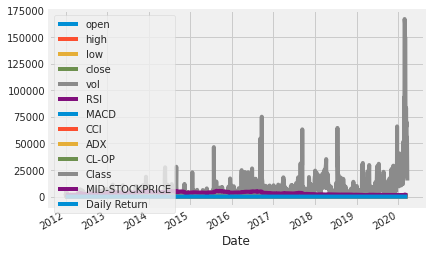

In [ ]:
stockdata.plot()

In [ ]:
stockdata['RSI'].plot

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(stockdata['RSI'])

In [ ]:
#Ho : It is non stationary
#H1: It is stationary
def adfuller_test(rsi):
  result = adfuller(rsi)
  labels = ['SDF Test Statistics','p-value', '#Lags used','Number of observations used']
  for value,label in zip(result,labels):
    print(label+ ' : ' + str(value))
  if result[1]<= 0.05:
    print('Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary ')

In [ ]:
adfuller_test(stockdata['RSI'])

SDF Test Statistics : -7.869299237453703
p-value : 5.03519148273082e-12
#Lags used : 2
Number of observations used : 1906
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary 


In [ ]:
stockdata['RSI first difference'] = stockdata['RSI'] - stockdata['RSI'].shift(1)

In [ ]:
stockdata['RSI seasonal first difference'] =  stockdata['RSI'] - stockdata['RSI'].shift(365)

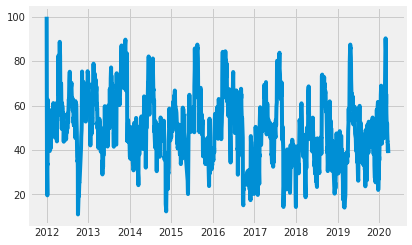

In [ ]:
plt.plot(stockdata['RSI'])

In [ ]:
stockdata

,open,high,low,close,vol,RSI,MACD,CCI,ADX,CL-OP,Class,MID-STOCKPRICE,Daily Return,RSI seasonal first difference
Date,,,,,,,,,,,,,,
2012-01-02,879.0,913.0,882.0,900.0,1002,100.000000,0.471154,66.666667,100.000000,21.0,1,1795.0,NaN,NaN
2012-01-03,900.0,916.0,892.0,892.0,2653,70.909091,0.352264,54.237288,100.000000,-8.0,0,1808.0,0.007242,NaN
2012-01-04,892.0,875.0,842.0,865.0,490,34.466349,-0.685267,-84.313725,67.623618,-27.0,0,1717.0,-0.050332,NaN
2012-01-05,865.0,875.0,858.0,858.0,121,30.141309,-1.513166,-59.581320,52.310464,-7.0,0,1733.0,0.009319,NaN
2012-01-08,858.0,845.0,814.0,830.0,4835,19.565232,-3.179699,-141.040462,54.601490,-28.0,0,1659.0,-0.042701,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-16,741.0,764.0,723.0,750.0,55501,43.675570,7.924927,-124.141364,26.345841,9.0,1,1487.0,-0.031270,-21.683030
2020-03-17,765.0,765.0,721.0,731.0,46620,41.364612,1.680259,-115.728978,29.561957,-34.0,0,1486.0,-0.000672,-23.993988
2020-03-18,731.0,739.0,700.0,715.0,43913,39.470618,-4.507789,-120.879121,33.988905,-16.0,0,1439.0,-0.031629,-18.790628


In [ ]:
adfuller_test(stockdata['RSI seasonal first difference'].dropna())

SDF Test Statistics : -6.641477969860403
p-value : 5.396175629065069e-09
#Lags used : 3
Number of observations used : 1540
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary 


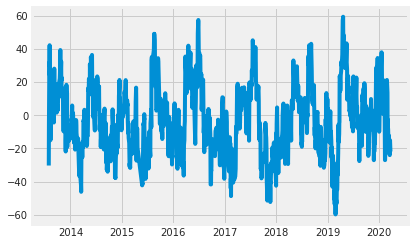

In [ ]:
plt.plot(stockdata['RSI seasonal first difference'])

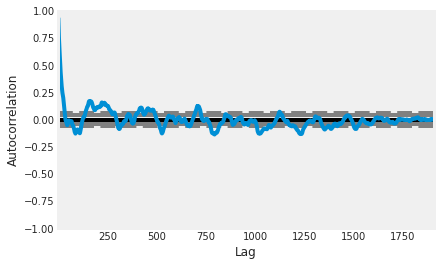

In [ ]:
pd.plotting.autocorrelation_plot(stockdata['RSI'])
plt.show()

In [ ]:
#correlation and partial correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

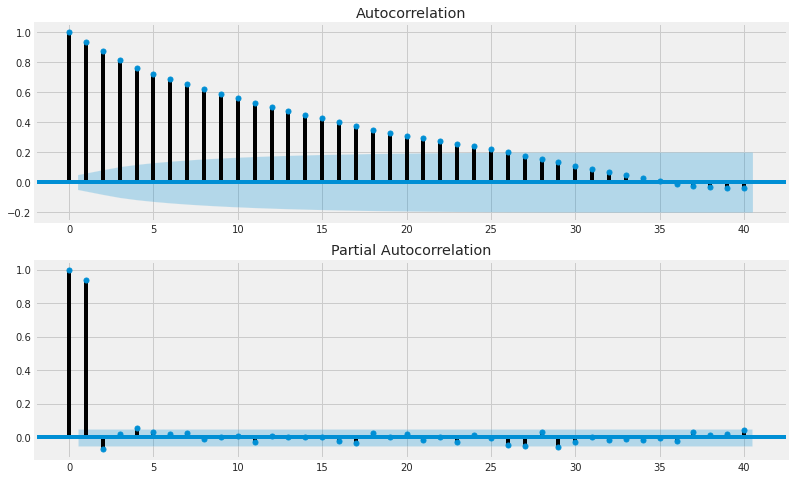

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stockdata['RSI seasonal first difference'].iloc[366:], lags =40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stockdata['RSI seasonal first difference'].iloc[366:], lags = 40, ax=ax2)

In [ ]:
#for non-seasonal data
#p=q, d = 1, q = 0 or 1
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
model=ARIMA(stockdata['RSI'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.RSI   No. Observations:                 1908
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5795.200
Method:                       css-mle   S.D. of innovations              5.045
Date:                Wed, 05 Aug 2020   AIC                          11598.399
Time:                        10:00:07   BIC                          11620.614
Sample:                             1   HQIC                         11606.575
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0331      0.124     -0.266      0.790      -0.277       0.211
ar.L1.D.RSI    -0.1824      0.169     -1.080      0.280      -0.513       0.149
ma.L1.D.RSI     0.2743      0.164      1.671      0.095      -0.048       0.596
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.4826           +0.0000j            5.4826            0.5000
MA.1           -3.6454           +0.0000j            3.6454            0.5000
-----------------------------------------------------------------------------
"""

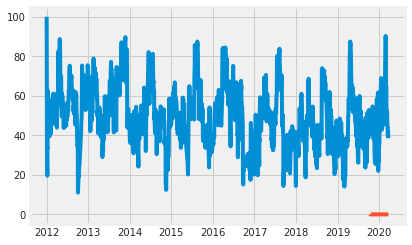

In [ ]:
stockdata['rsiforecast']=model_fit.predict(start=1800,end=1908,dynamic=True)
plt.plot(stockdata[['RSI','rsiforecast']])

In [ ]:
model=sm.tsa.statespace.SARIMAX(stockdata['RSI'],order=(1, 1, 1),seasonal_order=(1,1,1,365))
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
stockdata['rsiforecast']=results.predict(start=1800,end=1908,dynamic=True)
plt.plot(stockdata[['RSI','rsiforecast']])

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[stockdata.index[-1]+ DateOffset(Date=x)for x in range(0,365)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=stockdata.columns)

In [ ]:
future_datest_df.tail()


In [ ]:
future_df=pd.concat([stockdata,future_datest_df])

In [ ]:
future_df['rsiforecast'] = results.predict(start = 1908, end = 2273, dynamic= True)  
plt.plot(future_df[['RSI', 'rsiforecast']])

fatal: not a git repository (or any of the parent directories): .git
